In [1]:
# add matplotlib inline magic command
%matplotlib inline

# dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

In [2]:
# declare variables for files to load
city_data_to_load = "/Users/alexhatheway/Desktop/DataViz/Week 5 Matplotlib/PyBer_Analysis/resources/city_data.csv"
ride_data_to_load = "/Users/alexhatheway/Desktop/DataViz/Week 5 Matplotlib/PyBer_Analysis/resources/ride_data.csv"

In [3]:
city_data_df = pd.read_csv("/Users/alexhatheway/Desktop/DataViz/Week 5 Matplotlib/PyBer_Analysis/resources/city_data.csv")

city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
ride_data_df = pd.read_csv("/Users/alexhatheway/Desktop/DataViz/Week 5 Matplotlib/PyBer_Analysis/resources/ride_data.csv")

ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
city_data_df.count().isnull()

city            False
driver_count    False
type            False
dtype: bool

In [6]:
ride_data_df.count().isnull()

city       False
date       False
fare       False
ride_id    False
dtype: bool

In [7]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [8]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [9]:
#check for null values
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [10]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [11]:
# check data types to make sure driver is an int
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [12]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
#see how many city types there are
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [14]:
# get number of data points for urban cities
sum(city_data_df['type'] == 'Urban')

66

In [15]:
# get number of data points for SUBURBAN cities
sum(city_data_df['type'] == 'Suburban')

36

In [16]:
# get number of data points for RURAL cities
sum(city_data_df['type'] == 'Rural')

18

In [17]:
# merge the dataframes
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = 'left', on = 'city')
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [18]:
# create 3 new dataframes corresponding to city types

#create urban dataframe
urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [19]:
# create suburban cities dataframe
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [20]:
rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [21]:
# create 3 series -- one for each city type --, each gives number of rides per city

#get urban ride count series
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [22]:
# get suburban ride count series
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [23]:
# get rural ride count series
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [24]:
# get average fare as series for each city type

# get average URBAN fare
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [25]:
# get the average SUBURBAN fare
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [26]:
# get the average RURAL fare
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [27]:
#get average number of drivers for each city type
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
urban_driver_count

city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

In [28]:
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [29]:
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

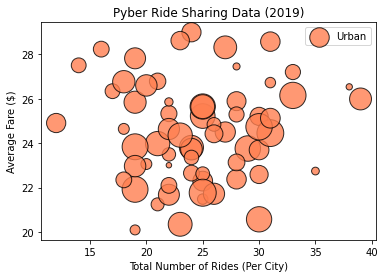

In [30]:
#make scatter plot for urban cities
plt.scatter(urban_ride_count, urban_avg_fare, 
            s=10*urban_driver_count, 
            fc='coral', ec='black', 
            linewidths=1, alpha=.8, 
            label="Urban")
plt.title('Pyber Ride Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
#plt.grid()
plt.legend()

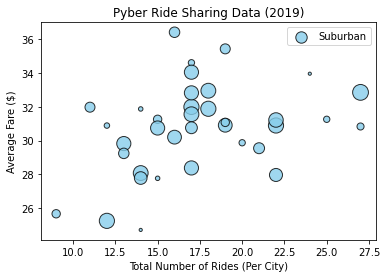

In [31]:
#make scatter plot for SUBURBAN cities
plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s = 10*suburban_driver_count,
            fc='skyblue', ec = 'black', 
            linewidths=1, alpha = .8,
           label = 'Suburban')
plt.title('Pyber Ride Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
#plt.grid()
plt.legend()

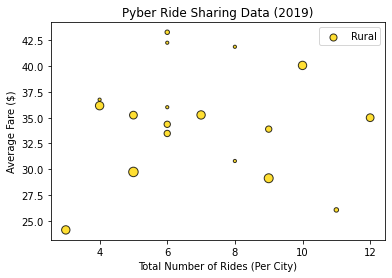

In [32]:
#make scatter plot for RURAL cities
plt.scatter(rural_ride_count, rural_avg_fare,
           s = 10*rural_driver_count,
           fc = 'gold', ec = 'black',
           linewidths = 1, alpha = .8,
           label = 'Rural')
plt.title('Pyber Ride Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.legend()

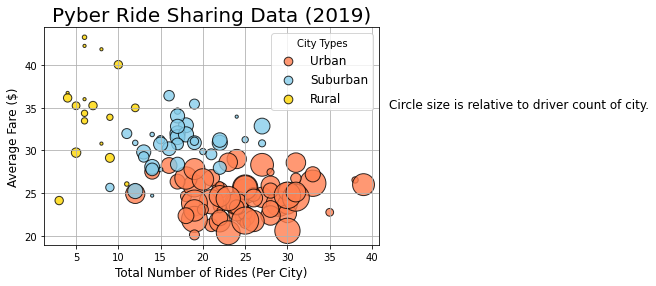

<Figure size 432x288 with 0 Axes>

In [33]:
#create chart for all cities
plt.scatter(urban_ride_count, urban_avg_fare, 
            s=10*urban_driver_count, 
            fc='coral', ec='black', 
            linewidths=1, alpha=.8, 
            label="Urban")
plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s = 10*suburban_driver_count,
            fc='skyblue', ec = 'black', 
            linewidths=1, alpha = .8,
           label = 'Suburban')
plt.scatter(rural_ride_count, rural_avg_fare,
           s = 10*rural_driver_count,
           fc = 'gold', ec = 'black',
           linewidths = 1, alpha = .8,
           label = 'Rural')

plt.title('Pyber Ride Sharing Data (2019)', fontsize=20)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.xlabel('Total Number of Rides (Per City)', fontsize=12)

# create legend
lgnd = plt.legend(fontsize = 12, mode = 'Expanded', scatterpoints=1, loc = 'best',
                 title='City Types')

lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.text(42, 35, 'Circle size is relative to driver count of city.', fontsize = 12)

plt.grid()

plt.show()

#save figure
plt.savefig("analysis/Fig1.png")

In [34]:
#get summary statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [35]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [36]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [37]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [38]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [39]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [40]:
# calculate the mean of the ride count for each city type
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [41]:
round(urban_ride_count.median(),2)

24.0

In [42]:
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [43]:
suburban_ride_count.mode()

0    17
dtype: int64

In [44]:
# calculate the measures of central tendency for the ride count for urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count:.2f}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.00.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [45]:
sts.mode(suburban_ride_count)

ModeResult(mode=array([17]), count=array([7]))

In [46]:
sts.mode(rural_ride_count)

ModeResult(mode=array([6]), count=array([5]))

In [47]:
# get the fares for the urban cities
urban_fares = urban_cities_df['fare']
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [48]:
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The median fare for urban trips is $24.53.
The median fare for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [50]:
suburban_fares = suburban_cities_df['fare']
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [51]:
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The median fare for suburban trips is $30.97.
The median fare for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [52]:
rural_fares = rural_cities_df['fare']
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [53]:
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The median fare for rural trips is $34.62.
The median fare for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [54]:
# get the driver count data from the urban cities
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [62]:
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of drivers in urban cities is {mean_urban_drivers:.0f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median number of drivers in urban cities is {median_urban_drivers:.0f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode number of drivers in urban cities is {mode_urban_drivers}.")

The mean number of drivers in urban cities is 37.
The median number of drivers in urban cities is 37.
The mode number of drivers in urban cities is ModeResult(mode=array([39]), count=array([86])).


In [63]:
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [64]:
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of drivers in suburban cities is {mean_suburban_drivers:.0f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median number of drivers in suburban cities is {median_suburban_drivers:.0f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode number of drivers in suburban cities is {mode_suburban_drivers}.")

The mean number of drivers in suburban cities is 14.
The median number of drivers in suburban cities is 16.
The mode number of drivers in suburban cities is ModeResult(mode=array([20]), count=array([79])).


In [65]:
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [66]:
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of drivers in rural cities is {mean_rural_drivers:.0f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median number of drivers in rural cities is {median_rural_drivers:.0f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode number of drivers in rural cities is {mode_rural_drivers}.")

The mean number of drivers in rural cities is 4.
The median number of drivers in rural cities is 4.
The mode number of drivers in rural cities is ModeResult(mode=array([1]), count=array([32])).


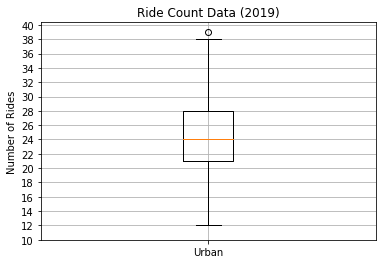

In [67]:
# create a box-and-whisker plot for the urban cities ride count
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# add the title, y-axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

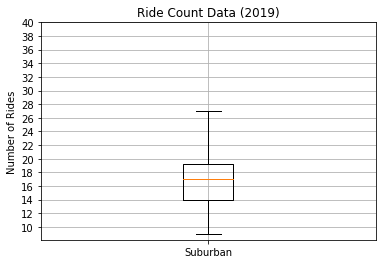

In [68]:
# create box and whisker plot for suburban cities ride count
x_labels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

# add the title, y-axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

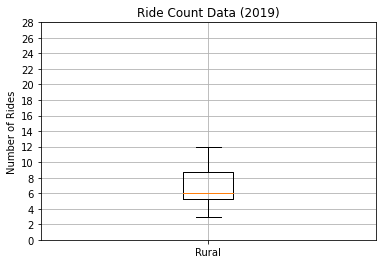

In [70]:
# create box and whisker plot for rural cities ride count
x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)

# add the title, y-axis label and grid
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 30, step=2.0))
ax.grid()
plt.show()

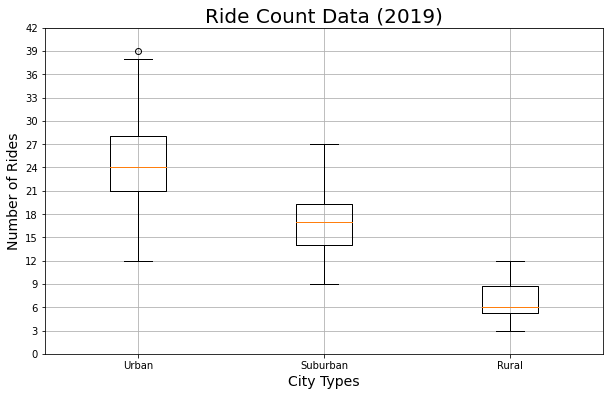

In [73]:
# Add all ride count box-and-whisker plots to the same graph
x_labels = ['Urban', 'Suburban', 'Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
#save the figure
plt.savefig("analysis/Fig2.png")
plt.show()

In [77]:
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [82]:
# get the city with the outlier of 39 from the urban ride count series
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


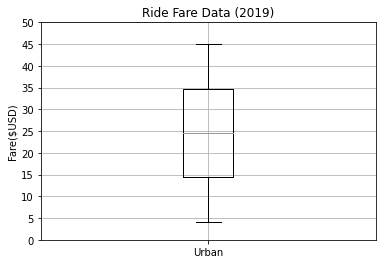

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [84]:
# create box and whisker plots for urban fare data
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

# add the title, y-axis label and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step = 5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_fares.describe()

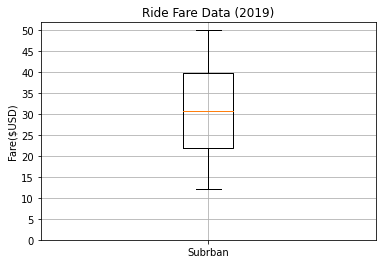

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [86]:
# create box and whisker plots for SUBURBAN fare data
x_labels = ['Subrban']
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

# add the title, y-axis label and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step = 5.0))
ax.grid()
plt.show()

print("Summary Statistics")
suburban_fares.describe()

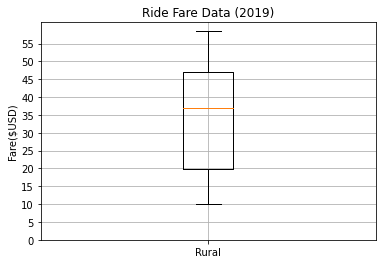

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [92]:
# create box and whisker plots for RURAL fare data
x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

# add the title, y-axis label and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 60, step = 5.0))
ax.grid()
plt.show()

print("Summary Statistics")
rural_fares.describe()

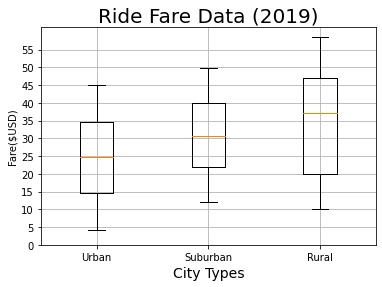

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

<Figure size 432x288 with 0 Axes>

In [96]:
# create box and whisker plots for all three city types fare data
x_labels = ['Urban', 'Suburban', 'Rural']
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots()
ax.boxplot(ride_fare_data, labels=x_labels)

# add the title, y-axis label and grid
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_xlabel('City Types', fontsize=14)
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 60, step = 5.0))
ax.grid()
plt.show()
plt.savefig("analysis/Fig3.png")

print("Summary Statistics")
rural_fares.describe()

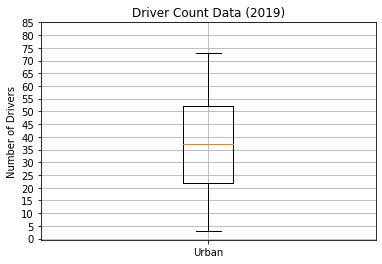

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [97]:
# create box and whisker plots for driver count data
#urban drivers
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)

# add title y=axis label and grid
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

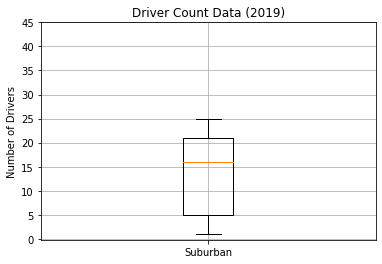

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [99]:
# suburban drivers
x_labels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)

# add title y=axis label and grid
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 50, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()



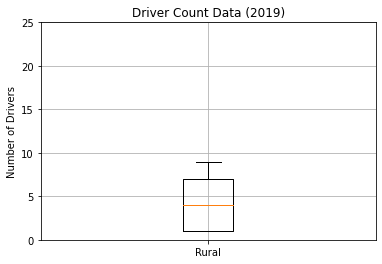

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [101]:
# suburban drivers
x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)

# add title y=axis label and grid
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 30, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

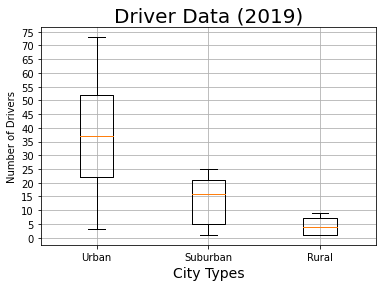

Summary Statistics
Urban Drivers
count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64
Suburban Drivers
count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64
Rural Drivers
count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64


<Figure size 432x288 with 0 Axes>

In [106]:
# create box and whisker plots for all three city types DRIVER data
x_labels = ['Urban', 'Suburban', 'Rural']
driver_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots()
ax.boxplot(driver_data, labels=x_labels)

# add the title, y-axis label and grid
ax.set_title('Driver Data (2019)', fontsize=20)
ax.set_xlabel('City Types', fontsize=14)
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 80, step = 5.0))
ax.grid()
plt.show()
plt.savefig("analysis/Fig4.png")

print("Summary Statistics")
print("Urban Drivers")
print(urban_drivers.describe())
print("Suburban Drivers")
print(suburban_drivers.describe())
print("Rural Drivers")
print(rural_drivers.describe())

In [110]:
# pie charts

# get total fares for each city type
sum_fares_by_type = pyber_data_df.groupby(['type']).sum()['fare']
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [112]:
# get the sum of all fares
total_fares = pyber_data_df['fare'].sum()
total_fares

63538.64

In [113]:
# calculate the percentage of fares for each city type
#type_percents = 100 * sum_fares_by_type / total_fares
#type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [114]:
# calculate the percentage in one go
type_percents = 100 * (pyber_data_df.groupby(['type']).sum()['fare']) / (pyber_data_df['fare'].sum())
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

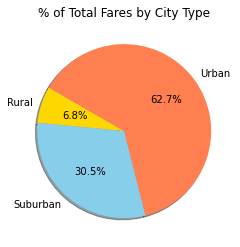

In [117]:
# create a pie chart based on percentage of fares by city type
import matplotlib as mpl
plt.subplots(figsize=(10,6))
plt.pie(type_percents, 
        labels=['Rural', 'Suburban', 'Urban'],
       colors=['gold', 'lightskyblue', 'lightcoral'],
       explode=(0,0,0.1),
        autopct='%1.1f%%',
        shadow=True,
        startangle=150
       )
#change font size
mpl.rcParams['fontsize'] = 14
plt.title("% of Total Fares by City Type")
plt.show()